In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'D:\PHBS\MLF\hw1\cs-training.csv',index_col=0)
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
train = train.fillna(train.mean())
train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [5]:
Y_train = train.iloc[:,0]  
X_train = train.iloc[:,1:]
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [6]:
from sklearn.preprocessing import StandardScaler

#standardize the training data
sc = StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train) 

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'pink', 'lightgreen',
          'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    reg = LogisticRegression(penalty='l1', C=10.**c ,solver='liblinear',multi_class='ovr', random_state=0)
    reg.fit(X_train_std, Y_train)
    weights.append(reg.coef_)
    params.append(10**c)
weights = np.array(weights)

In [9]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
weights

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[ 0.00000000e+00, -3.18620113e-01,  1.22405450e-01,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.88145404e-02]],

       [[ 0.00000000e+00, -4.15110197e-01,  1.73805286e+00,
         -3.24940970e-03, -3.05714534e-01, -2.53466385e-02,
          1.25199089e+00,  3.71335719e-02, -2.83605768e+00,
          9.44155636e-02]],

       [[-7.18732084e-03, -4.18805374e-01,  2.07199356e+00,
         -3.46267507e-02, -4.39260889e-01, -3.92807100e-02,
          1.88034693e+00,  7.16332066e-02, -3.79398143e+00,
          1.00607210e-01]],

       [[-9.06527557e-03, -4.19203361e-01,  2.10571064e+00,
         -3.89867286e-02, -4.53928592e-01, -4.06082255e-02,
          1.94546016e+00,  7.53064350e-02, -

In [11]:
weights = weights.reshape((10,10))
weights.shape

(10, 10)

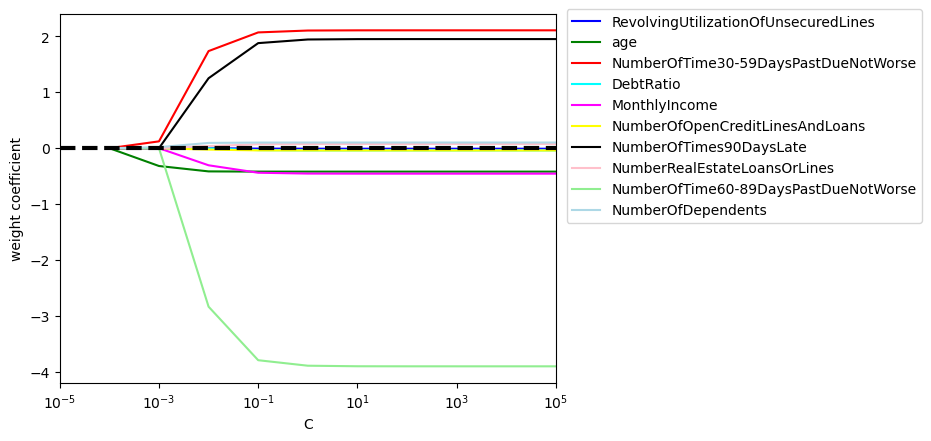

In [12]:
#select features by L1 penalty
ax = plt.subplot(111)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=train.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
plt.show()

In [13]:
# character 2 and 3 are selected
X_train_selected = train[['age','NumberOfTime30-59DaysPastDueNotWorse']]
sc = StandardScaler() 
sc.fit(X_train_selected) 
X_train_selected_std = sc.transform(X_train_selected) 

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [15]:
#standardize the test data
test = pd.read_csv(r'D:\PHBS\MLF\hw1\cs-test.csv',index_col=0)
Y_test = pd.read_csv(r'D:\PHBS\MLF\hw1\sampleEntry.csv',index_col=0)
Y_test = Y_test['Probability']
X_test_selected = test[['age','NumberOfTime30-59DaysPastDueNotWorse']]
sc = StandardScaler() 
sc.fit(X_test_selected) 
X_test_selected_std = sc.transform(X_test_selected) 

In [16]:
threshold = 0.5
Y_test = np.where(Y_test >= threshold, 1, 0)
Y_test = pd.DataFrame(Y_test).iloc[:,0]
Y_test

0         0
1         0
2         0
3         0
4         0
         ..
101498    0
101499    0
101500    0
101501    0
101502    0
Name: 0, Length: 101503, dtype: int32

In [17]:
X_combined_std = np.vstack((X_train_selected_std, X_test_selected_std))
y_combined = np.hstack((Y_train, Y_test))

# Logistic Regression

C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


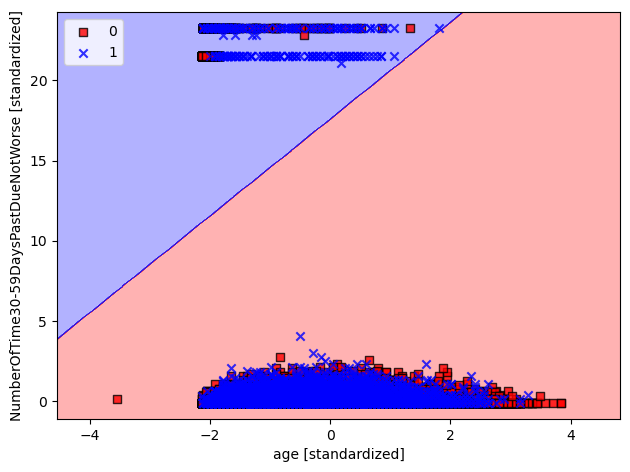

In [36]:
lr = LogisticRegression(C=1, random_state=2, solver='liblinear', multi_class='ovr')
lr.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=lr)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
lr.predict_proba(X_test_selected_std[:30, :])

array([[0.9212295 , 0.0787705 ],
       [0.94814188, 0.05185812],
       [0.95119213, 0.04880787],
       [0.90595283, 0.09404717],
       [0.87528484, 0.12471516],
       [0.956789  , 0.043211  ],
       [0.93599097, 0.06400903],
       [0.97271465, 0.02728535],
       [0.96292623, 0.03707377],
       [0.17502718, 0.82497282],
       [0.90616432, 0.09383568],
       [0.93971047, 0.06028953],
       [0.96292623, 0.03707377],
       [0.8853668 , 0.1146332 ],
       [0.94654998, 0.05345002],
       [0.87872729, 0.12127271],
       [0.96722391, 0.03277609],
       [0.90616432, 0.09383568],
       [0.88208753, 0.11791247],
       [0.9212295 , 0.0787705 ],
       [0.93205859, 0.06794141],
       [0.95407165, 0.04592835],
       [0.96404892, 0.03595108],
       [0.96158673, 0.03841327],
       [0.93389879, 0.06610121],
       [0.93787671, 0.06212329],
       [0.92573872, 0.07426128],
       [0.96176987, 0.03823013],
       [0.89770016, 0.10229984],
       [0.93000942, 0.06999058]])

In [37]:
y_pred = lr.predict(X_test_selected_std)
print('Test Accuracy: %.3f' % lr.score(X_test_selected_std, Y_test))

Test Accuracy: 0.984


C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


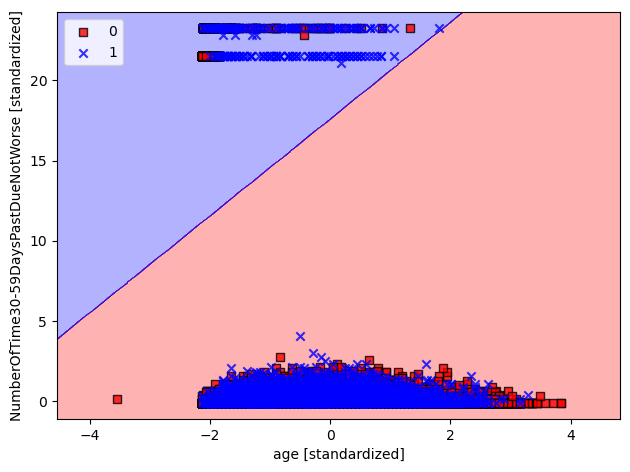

In [41]:
lr = LogisticRegression(C=10, random_state=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=lr)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# SVM

In [22]:
from sklearn.svm import SVC

C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


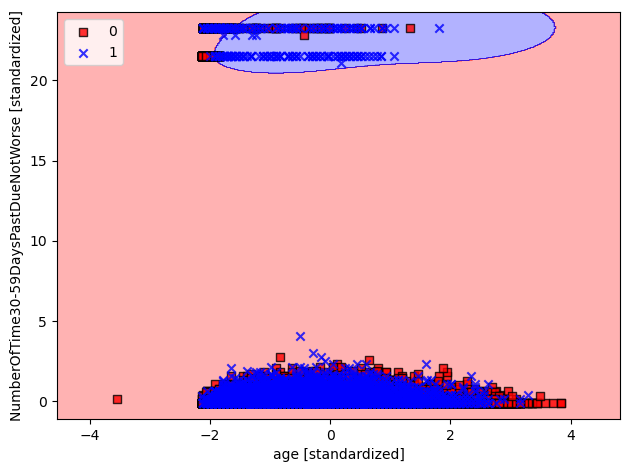

In [23]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
y_pred = svm.predict(X_test_selected_std)
print('Test Accuracy: %.3f' % svm.score(X_test_selected_std, Y_test))

Test Accuracy: 0.984


C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


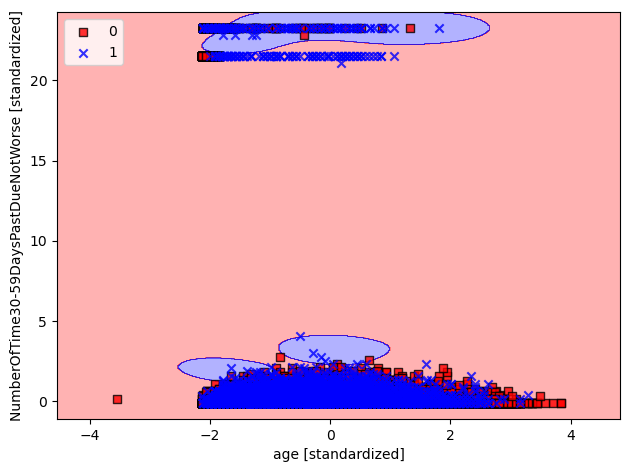

In [38]:
svm = SVC(kernel='rbf', random_state=1, gamma=1, C=1.0)
svm.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=6, 
                                    random_state=1)
tree_model.fit(X_train_selected_std, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


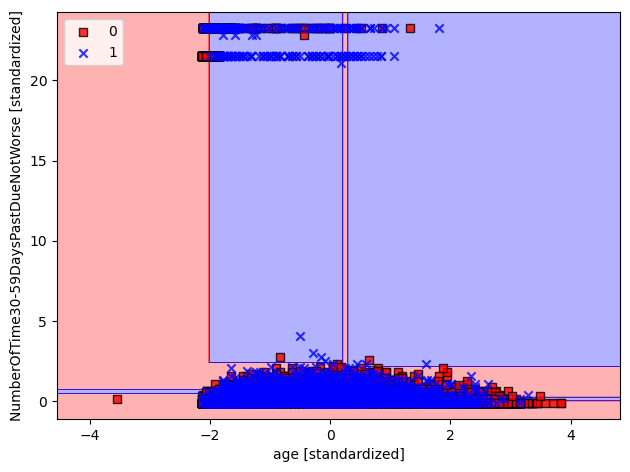

In [32]:
plot_decision_regions(X_combined_std, y_combined,classifier=tree_model)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
y_pred = tree_model.predict(X_test_selected_std)
print('Test Accuracy: %.3f' % tree_model.score(X_test_selected_std, Y_test))

Test Accuracy: 0.984


C:\Users\Haysen\AppData\Local\Temp\ipykernel_36816\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


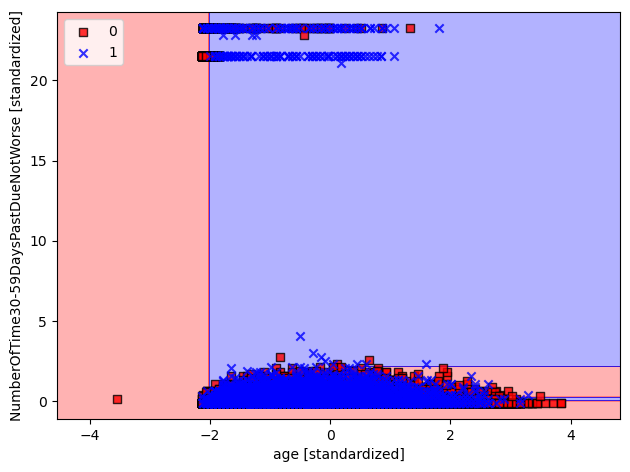

In [39]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=1)
tree_model.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=tree_model)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()